In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
seed=42

In [86]:
data = pd.read_csv("datass/dataset.csv")
# Rimuovi le righe in base alle condizioni specificate
# data = data[(data['Education_Level'] != 'Unknown') & (data['Income_Category'] != 'Unknown') & (data['Marital_Status'] != 'Unknown')]
data = data[(data['Income_Category'] != 'Unknown')]

data['Attrition_Flag'] = data.Attrition_Flag.map({'Attrited Customer': 1,
                                               'Existing Customer': 0})
data['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
0    0.840266
1    0.159734
Name: proportion, dtype: float64

In [87]:
variables_to_keep = [
    'Dependent_count',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Trans_Ct',
    'Avg_Utilization_Ratio',
    'Gender',
    'Income_Category'
]
data_subset = data.loc[:, variables_to_keep]

In [88]:
x = data_subset
y = pd.DataFrame(data['Attrition_Flag'])

categorical_columns = ['Gender', 'Income_Category']

x_encoded = pd.get_dummies(x, columns=categorical_columns)

In [89]:
x_train, x_val, y_train, y_val = train_test_split(x_encoded, y, test_size=0.2, random_state=seed, shuffle=True)

In [90]:
clf = LogisticRegression()
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
clf.fit(x_train_scaled, y_train)

x_val_scaled = scaler.transform(x_val)
y_hat = clf.predict(x_val_scaled)

accuracy = accuracy_score(y_val, y_hat)
confusion = confusion_matrix(y_val, y_hat)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.89
Confusion Matrix:
[[1459   58]
 [ 148  138]]


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
res = []

for C in np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True):
    clf = LogisticRegression(C=C)
    scaler = StandardScaler()

    x_train_scaled = scaler.fit_transform(x_train)
    clf.fit(x_train_scaled, y_train)

    x_val_scaled = scaler.transform(x_val)
    y_hat = clf.predict(x_val_scaled)

    accuracy = accuracy_score(y_val, y_hat)
    precision = precision_score(y_val, y_hat)
    recall = recall_score(y_val, y_hat)
    f1 = f1_score(y_val, y_hat)

    print(f'{C=}, {accuracy=}, {precision=}, {recall=}, {f1=}')
    res.append({
        'C': C,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })

C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C=0.001, accuracy=0.8480310593455352, precision=1.0, recall=0.04195804195804196, f1=0.08053691275167786
C=0.004641588833612777, accuracy=0.8813089295618414, precision=0.8272727272727273, recall=0.3181818181818182, f1=0.45959595959595956
C=0.021544346900318832, accuracy=0.8863006100942873, precision=0.7288135593220338, recall=0.45104895104895104, f1=0.5572354211663066
C=0.1, accuracy=0.8874098724348308, precision=0.7172774869109948, recall=0.479020979020979, f1=0.5744234800838575
C=0.46415888336127775, accuracy=0.8857459789240155, precision=0.7040816326530612, recall=0.4825174825174825, f1=0.5726141078838174
C=2.154434690031882, accuracy=0.8857459789240155, precision=0.7040816326530612, recall=0.4825174825174825, f1=0.5726141078838174
C=10.0, accuracy=0.8857459789240155, precision=0.7040816326530612, recall=0.4825174825174825, f1=0.5726141078838174
C=46.41588833612773, accuracy=0.8857459789240155, precision=0.7040816326530612, recall=0.4825174825174825, f1=0.5726141078838174
C=215.44346

C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

In [92]:
res_df = pd.DataFrame(res)
sorted_df = res_df.sort_values('Recall', ascending=False)
sorted_df

,C,Accuracy,Precision,Recall,F1-score
4,0.464159,0.885746,0.704082,0.482517,0.572614
5,2.154435,0.885746,0.704082,0.482517,0.572614
6,10.000000,0.885746,0.704082,0.482517,0.572614
7,46.415888,0.885746,0.704082,0.482517,0.572614
8,215.443469,0.885746,0.704082,0.482517,0.572614
9,1000.000000,0.885746,0.704082,0.482517,0.572614
3,0.100000,0.887410,0.717277,0.479021,0.574423
2,0.021544,0.886301,0.728814,0.451049,0.557235
1,0.004642,0.881309,0.827273,0.318182,0.459596
0,0.001000,0.848031,1.000000,0.041958,0.080537


In [93]:
res_df.iloc[res_df.Recall.argmax()]

C            0.464159
Accuracy     0.885746
Precision    0.704082
Recall       0.482517
F1-score     0.572614
Name: 4, dtype: float64

In [94]:
C = 0.464159

In [95]:
print(f'Logistic Regression, {C=}')
clf = LogisticRegression(C=C)
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
clf.fit(x_train_scaled, y_train)

x_val_scaled = scaler.transform(x_val)
y_hat_val = clf.predict(x_val_scaled)
accuracy_val = accuracy_score(y_val, y_hat_val)
precision_val = precision_score(y_val, y_hat_val)
recall = recall_score(y_val, y_hat_val)
print(f'VAL: {accuracy_val=}, {recall=}')


Logistic Regression, C=0.464159
VAL: accuracy_val=0.8857459789240155, recall=0.4825174825174825


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
confusion_val = confusion_matrix(y_val, y_hat_val)
print(confusion_val)

[[1459   58]
 [ 148  138]]


Text(0.5, 23.52222222222222, 'Prediction')

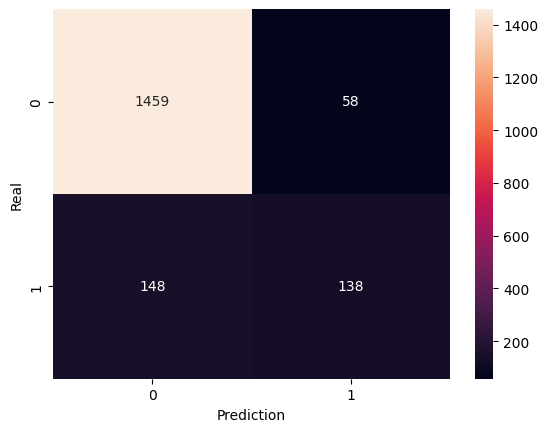

In [97]:
sns.heatmap(confusion_matrix(y_val, y_hat_val), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction')

In [98]:
y_val

,Attrition_Flag
7123,0
2725,0
2755,0
6829,0
1295,0
...,...
8200,1
1576,1
2422,0
9759,1


In [99]:

df

,0
0,0.014645
1,0.248078
2,0.024386
3,0.015385
4,0.541070
...,...
1798,0.310759
1799,0.528520
1800,0.074693
1801,0.248412


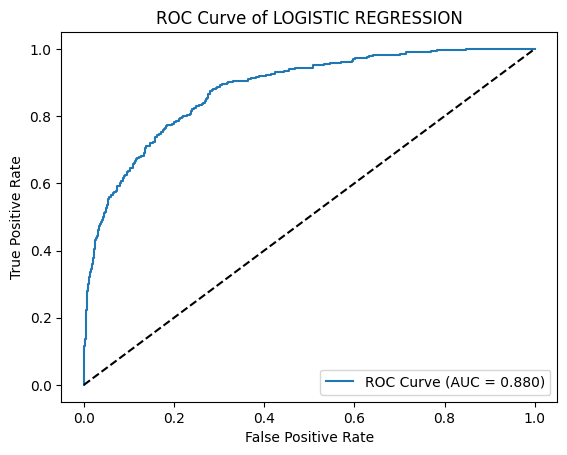

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
y_score = clf.predict_proba(x_val_scaled)
y_score = pd.DataFrame(y_score[:,1])
# Calcolo della curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_score)

# Calcolo dell'area sotto la curva ROC (AUC)
auc = roc_auc_score(y_val, y_score)

# Plot della curva ROC
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of LOGISTIC REGRESSION')
plt.legend(loc='lower right')
plt.show()